# EE6132 Assignment 2

EE16B070  Kishore GV

Importing Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
train_on_gpu = torch.cuda.is_available()

import numpy as np
import matplotlib.pyplot as plt

In [2]:

train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(),download = True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=100, shuffle=True)

In [3]:
#Initializing hyperparameters
num_epochs = 1
num_classes = 10
batch_size = 100
learning_rate = 0.001

# Defining the network layer by layer

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1,padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1,padding=1)
        self.fc1 = nn.Linear(in_features=32*7*7, out_features=500)
        self.fc2 = nn.Linear(in_features=500, out_features=10)

    def forward(self, x):
        #print(x.shape)
        x = F.relu(self.conv1(x))
        #print(x.shape)
        x = F.max_pool2d(x, 2, 2)
        #print(x.shape)
        x = F.relu(self.conv2(x))
        #print(x.shape)
        x = F.max_pool2d(x, 2, 2)
        #print(x.shape)        
        x = x.view(-1, 7*7*32)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = self.fc2(x)
        #print(x.shape)
        return F.log_softmax(x, dim=1)

In [5]:
model=Net()
model=model.cuda()


#Create instance of optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
from torchsummary import summary
summary(model, input_size=(1,28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 32, 14, 14]           9,248
            Linear-3                  [-1, 500]         784,500
            Linear-4                   [-1, 10]           5,010
Total params: 799,078
Trainable params: 799,078
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.24
Params size (MB): 3.05
Estimated Total Size (MB): 3.29
----------------------------------------------------------------


Out of a total of 799078 parameters, we have 9568 trainable parameters in the Conv Layers and 789510 parameters in Fully Connected Layers.

We have 31870 neurons in total out of which only 510 belong to the fully connected layers. The rest 31360 neurons are a part of the convolutional layers.

# Function to Train

In [128]:
def train(model,criterion,optimizer,num_epochs):
    iter = 0
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images).cuda()
            labels = Variable(labels).cuda()
            #print(labels.shape)
            #print(images.shape)
        
            #Clear the gradients
            optimizer.zero_grad()
        
            #Forward propagation 
            outputs = model(images)  
            #print(outputs.shape)
        
            #Calculating loss with softmax to obtain cross entropy loss
            loss = F.nll_loss(outputs,labels)
        
            #Backward propation
            loss.backward()
        
            #Updating gradients
            optimizer.step()
        
            iter += 1
        
            #Total number of labels
            total = labels.size(0)
        
            #Obtaining predictions from max value
            _, predicted = torch.max(outputs.data, 1)
        
            #Calculate the number of correct answers
            correct = (predicted == labels).sum().item()
        
            #Print loss and accuracy
            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item(),
                          ((correct*100.0) / total)))

In [129]:
train(model,criterion,optimizer,num_epochs=8)

Epoch [1/8], Step [100/600], Loss: 0.3943, Accuracy: 88.00%
Epoch [1/8], Step [200/600], Loss: 0.1341, Accuracy: 96.00%
Epoch [1/8], Step [300/600], Loss: 0.1415, Accuracy: 95.00%
Epoch [1/8], Step [400/600], Loss: 0.0454, Accuracy: 98.00%
Epoch [1/8], Step [500/600], Loss: 0.0675, Accuracy: 98.00%
Epoch [1/8], Step [600/600], Loss: 0.0420, Accuracy: 99.00%
Epoch [2/8], Step [100/600], Loss: 0.0742, Accuracy: 98.00%
Epoch [2/8], Step [200/600], Loss: 0.1694, Accuracy: 95.00%
Epoch [2/8], Step [300/600], Loss: 0.0434, Accuracy: 98.00%
Epoch [2/8], Step [400/600], Loss: 0.0618, Accuracy: 99.00%
Epoch [2/8], Step [500/600], Loss: 0.0366, Accuracy: 99.00%
Epoch [2/8], Step [600/600], Loss: 0.0510, Accuracy: 99.00%
Epoch [3/8], Step [100/600], Loss: 0.1033, Accuracy: 96.00%
Epoch [3/8], Step [200/600], Loss: 0.0142, Accuracy: 100.00%
Epoch [3/8], Step [300/600], Loss: 0.0337, Accuracy: 99.00%
Epoch [3/8], Step [400/600], Loss: 0.0103, Accuracy: 100.00%
Epoch [3/8], Step [500/600], Loss: 0.0

# Saving Model for Reuse

In [132]:
torch.save(model.state_dict(),'./1.pth')

#Later to restore:
model.load_state_dict(torch.load('./1.pth'))
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

# Function to visualize filters

In [133]:
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i][0],cmap='gray')
        #print(tensor[i][0].shape)
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()




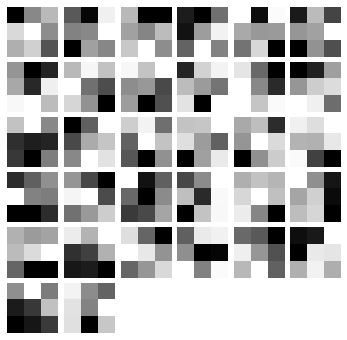

In [134]:
tensor = model.conv1.weight.detach()
plot_kernels(tensor.cpu())


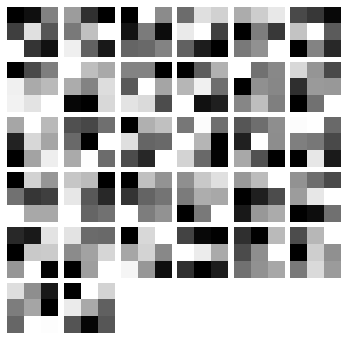

In [135]:
tensor = model.conv2.weight.detach()
plot_kernels(tensor.cpu())

## Interpretation of filters

Filters in layer 1 seem to capture edges along the vertical, horizontal and diagonal directions. Edges are low level features. As expected, layer 1 captures low level features. Layer 2 filters seem much more complex to interpret. They capture higher level features.

# Testing

In [136]:
#Testing the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 98.71 %


# True and Predicted Labels for random samples

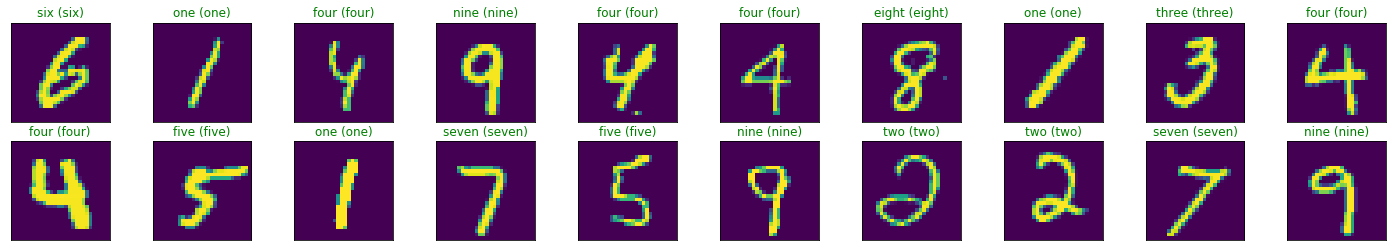

In [137]:
# specify the image classes
classes=['zero','one','two','three','four','five','six','seven','eight','nine']


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=100, shuffle=True)
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()
images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.cpu().numpy()) 

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    images = images.cpu()
    plt.imshow(images[idx][0])
    #plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

## Class to retrieve activations of intermediate layers

In [138]:

class SaveFeatures():
    def __init__(self, module):
        self.hook = module.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = torch.tensor(output,requires_grad=True).cuda()
    def close(self):
        self.hook.remove()

In [139]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=1, shuffle=True)
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()
images = images.cuda()


activations1 = SaveFeatures(list(model.children())[0])
activations2 = SaveFeatures(list(model.children())[1])
activations_final = SaveFeatures(list(model.children())[3])
model(images)


C:\Users\Kishore\.conda\envs\dlcv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


tensor([[-1.4182e+01, -5.7220e-06, -1.4436e+01, -2.0470e+01, -1.5389e+01,
         -1.7230e+01, -1.8018e+01, -1.2957e+01, -1.3161e+01, -1.8781e+01]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward>)

# Convolution Layer 1 Activation Visualization

32


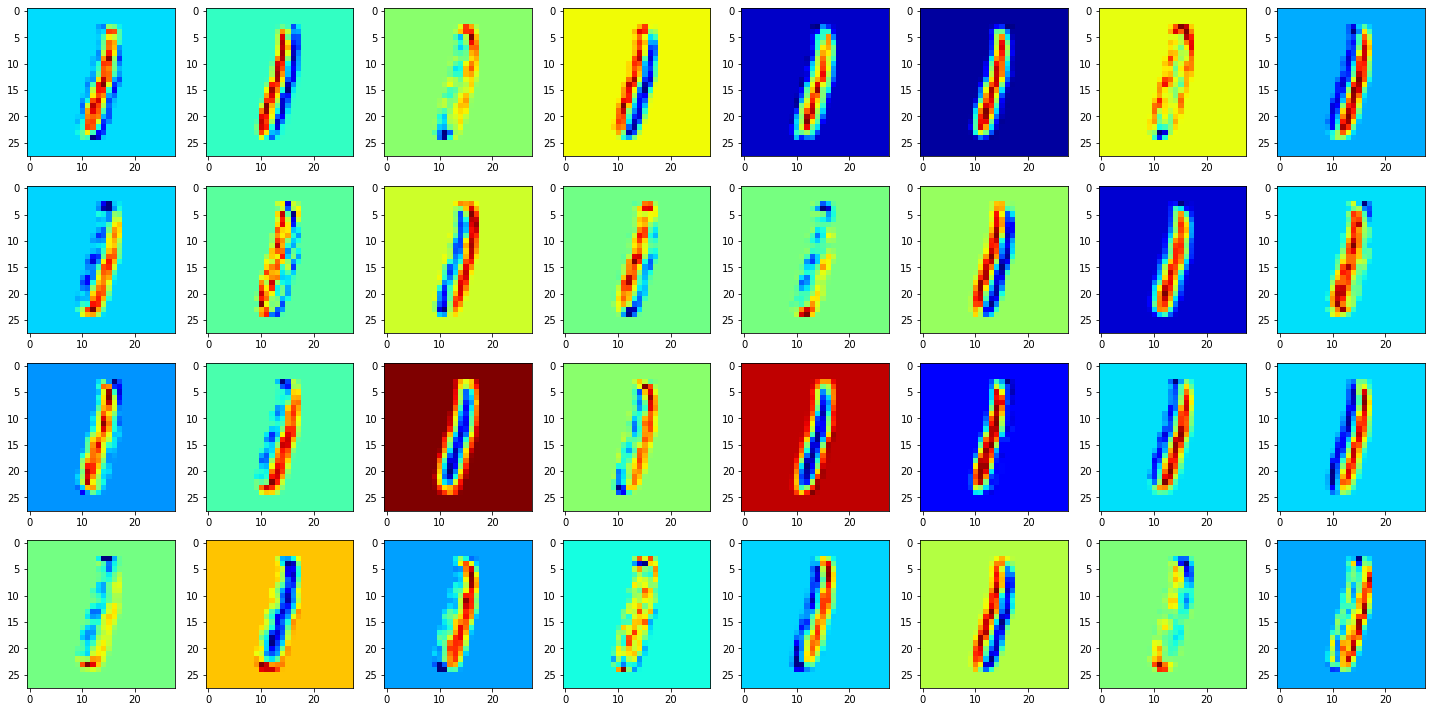

In [140]:
act_1=activations1.features[0]
act_1=act_1.cpu().detach().numpy()
print(act_1.shape[0])
plt.figure(figsize=(20,10))
for i in range(act_1.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(act_1[i,:,:],cmap='jet')
plt.tight_layout()
plt.show()

# Convolution Layer 2 Activation Visualization

32


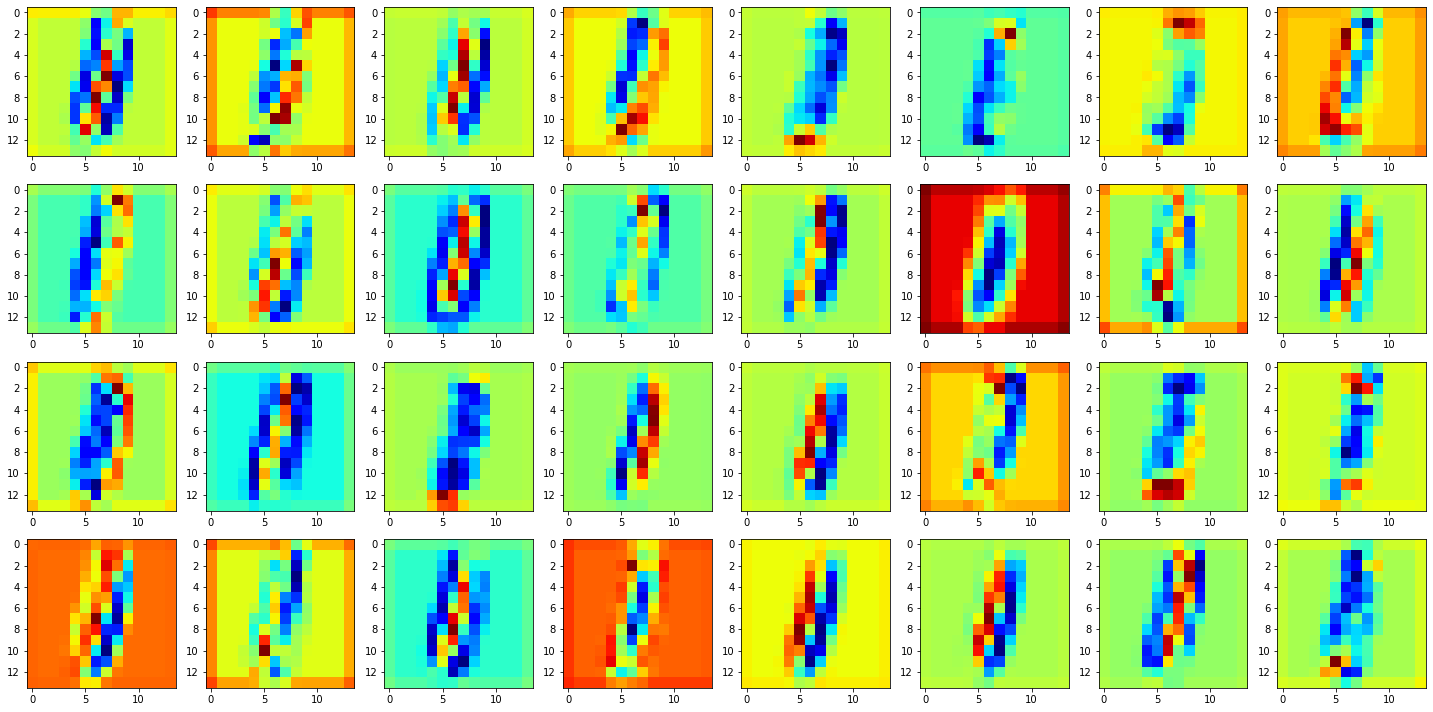

In [141]:
act_2=activations2.features[0]
act_2=act_2.cpu().detach().numpy()
print(act_2.shape[0])
plt.figure(figsize=(20,10))
for i in range(act_2.shape[0]):
    plt.subplot(4,8,i+1)
    plt.imshow(act_2[i,:,:],cmap='jet')
plt.tight_layout()
plt.show()

## Interpretation of activations

Activations of layer 1 capture the edges which is clearly seen. The 2nd layer captures more complex features.

In [130]:
#lr=0.1
#true_class=0
#activations_final = SaveFeatures(list(model.children())[3])
#noise_matrix = np.float32(128 + 50*np.random.randn(1,1,28,28))/255
#noise_tensor=torch.from_numpy(noise_matrix).float().cuda()
#model(noise_tensor)
#true_class=labels.numpy()[0]
#activations_final.features[0,true_class]

#optimizer = torch.optim.Adam([noise_tensor], lr=lr, weight_decay=1e-6)
#loss = -activations_final.features[0,true_class]

# lr=0.01
# true_class=0
# noise_matrix = np.float32(128 + 50*np.random.randn(1,1,28,28))/255
# plt.imshow(noise_matrix[0][0],cmap='gray')

# Non-Targeted Attack

In [143]:
def nontargetedattack(true_class):    
    noise_matrix = np.float32(128 + 50*np.random.randn(1,1,28,28))/255
    noise_tensor=torch.from_numpy(noise_matrix).float().cuda()
    img_var = Variable(noise_tensor, requires_grad=True).cuda()
    optimizer = torch.optim.Adam([img_var], lr=0.01)
    activations_final = SaveFeatures(list(model.children())[3])
    true_class=0
    losses=np.zeros((100,1))


    for i in range(0,100):
        #Clear the gradients
        optimizer.zero_grad()

        #Forward propagation 
        output=model(img_var) 
        loss = -output[0,true_class]
        losses[i]=-output[0,true_class].cpu().detach().numpy()
        #print(img_var.grad)
        loss.backward()

        #Updating gradients
        optimizer.step()
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(img_var.detach().cpu().numpy()[0][0],cmap='gray')
    plt.title('Generated Non targeted Output of Class'+str(true_class))  
    plt.subplot(1,2,2)
    plt.plot(np.exp(-losses))
    plt.xlabel('Iterations')
    plt.title('Probability plot for class '+str(true_class))
    plt.plot(np.exp(-losses))
    plt.tight_layout()
    plt.show()


C:\Users\Kishore\.conda\envs\dlcv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


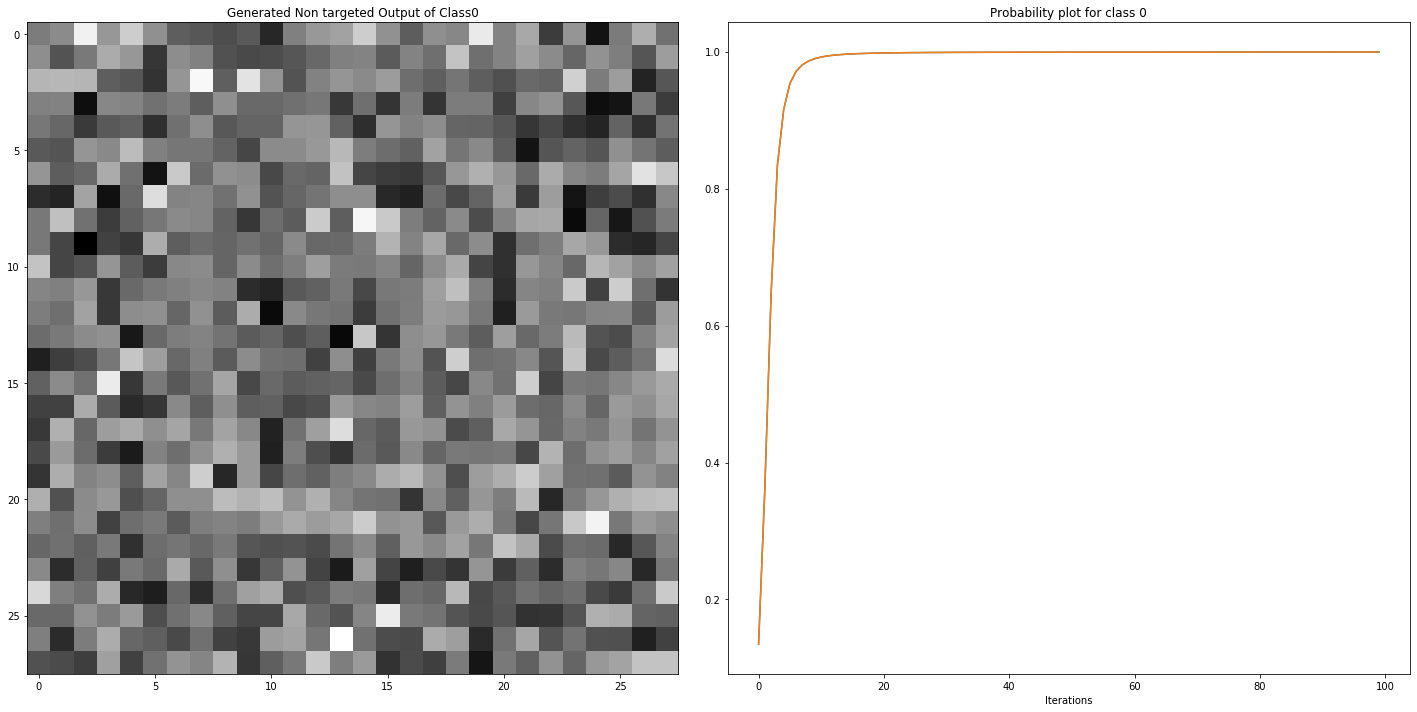

In [144]:
nontargetedattack(0)

C:\Users\Kishore\.conda\envs\dlcv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


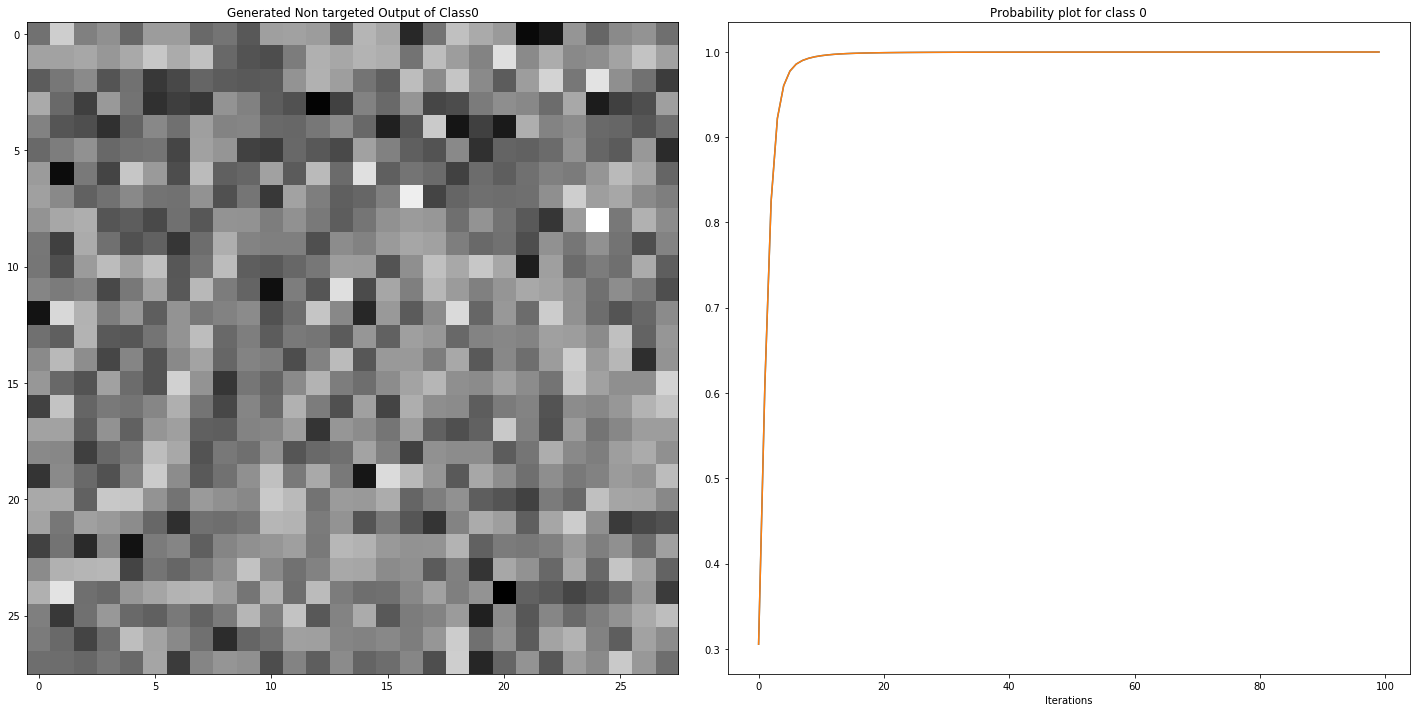

In [145]:
nontargetedattack(1)

The generated images don't resemble the targetted classes. This is because while generating these images, we haven't constrained the structure of the features present in the generated images.

# Targetted Attack

In [122]:
def targeted_attack(target_class):
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=1, shuffle=True)
    # obtain one test image
    dataiter = iter(test_loader)
    images, labels = dataiter.next()
    images.numpy()
    images = images.cuda()

    beta=0.01
    original_image.copy_(images)
    img_var = Variable(images, requires_grad=True).cuda()

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(original_image.detach().cpu().numpy()[0][0],cmap='gray')
    plt.title('Original Image') 


    optimizer = torch.optim.Adam([img_var], lr=0.01)

    for i in range(0,100):
            #Clear the gradients
            optimizer.zero_grad()

            #Forward propagation 
            output=model(img_var) 
            loss = -output[0,target_class] + beta*nn.MSELoss()(img_var,original_image)
            #losses[i]=-output[0,true_class].cpu().detach().numpy()
            #print(img_var.grad)
            loss.backward()

            #Updating gradients
            optimizer.step()

    #plt.title('Generated Non targeted Output of Class'+str(true_class))  
    plt.subplot(1,2,2)
    plt.imshow(img_var.detach().cpu().numpy()[0][0],cmap='gray')
    plt.title('Original Image Modified to be predicted as'+str(target_class)) 
    #plt.xlabel('Iterations')
    #plt.title('Probability plot for class '+str(true_class))
    #plt.plot(np.exp(-losses))
    plt.tight_layout()
    plt.show()

C:\Users\Kishore\.conda\envs\dlcv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


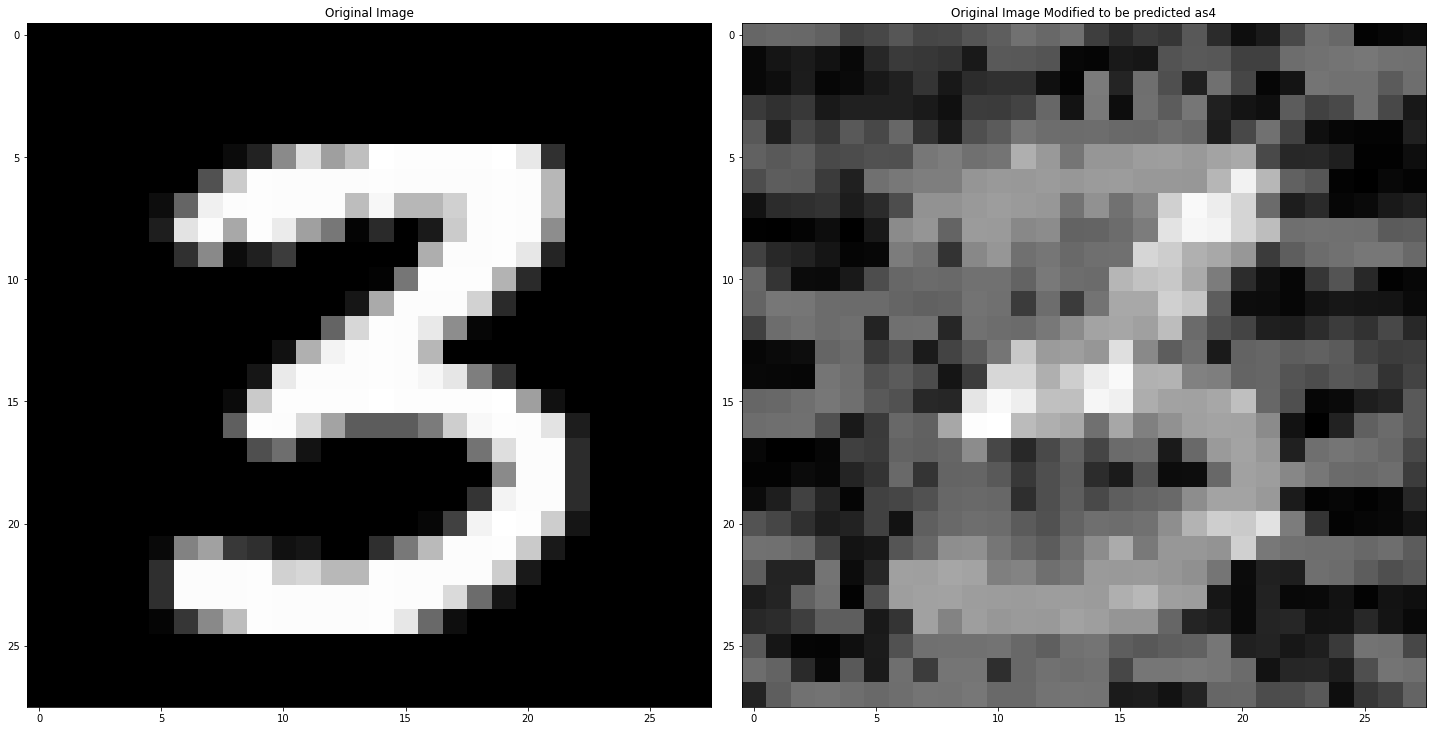

In [147]:
targeted_attack(4)

C:\Users\Kishore\.conda\envs\dlcv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


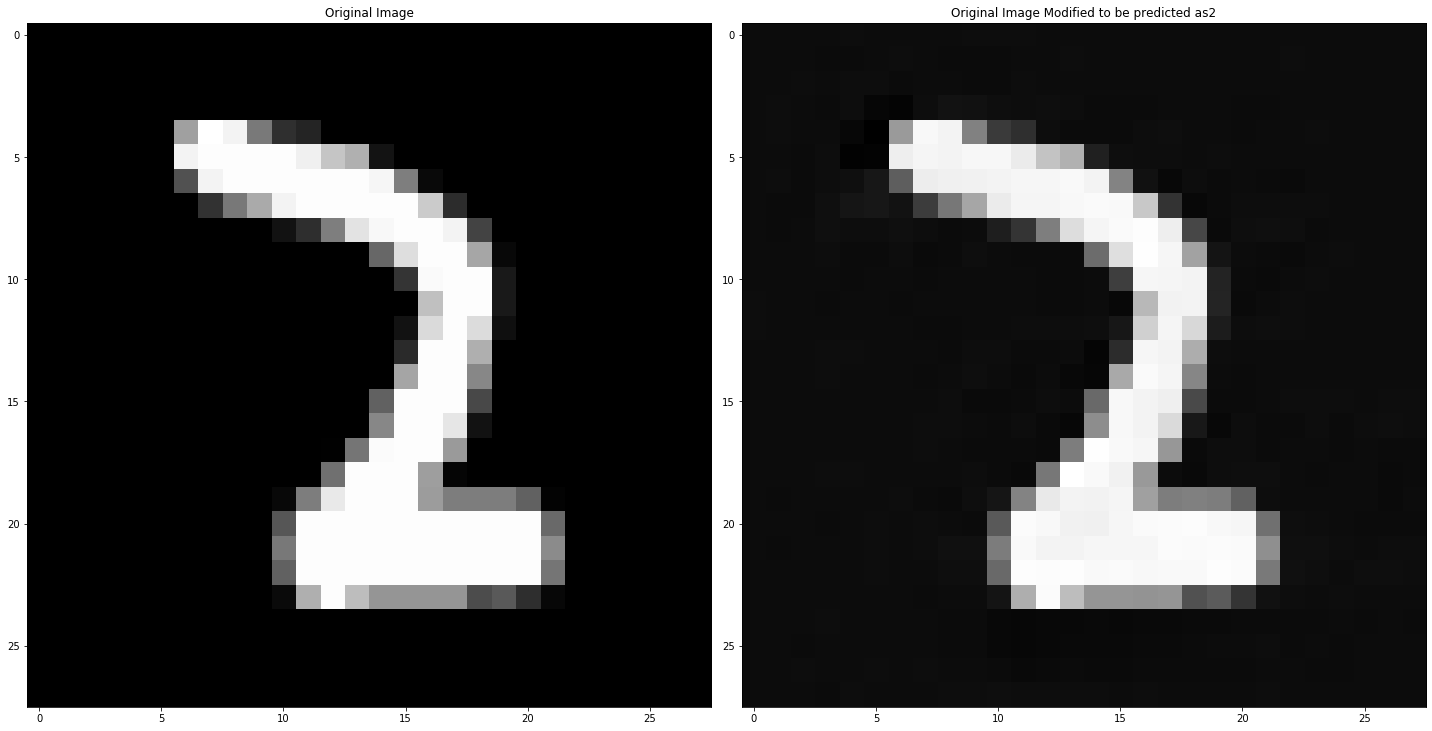

In [146]:
targeted_attack(2)

C:\Users\Kishore\.conda\envs\dlcv\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


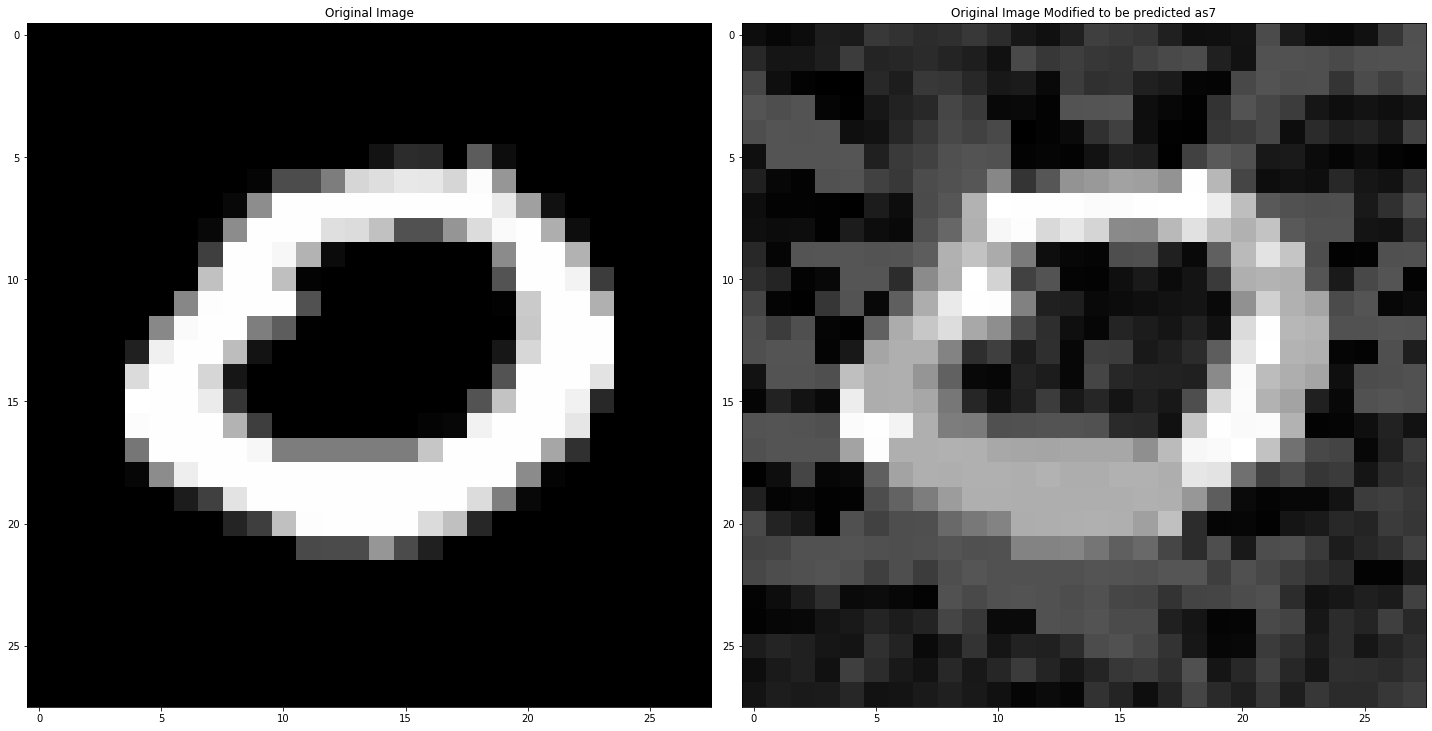

In [148]:
targeted_attack(7)

# Pytorch Autograd Visualization

In [7]:

from graphviz import Digraph
import torch
from torch.autograd import Variable
%matplotlib inline


def make_dot(var, params=None):
    """ Produces Graphviz representation of PyTorch autograd graph

    Blue nodes are the Variables that require grad, orange are Tensors
    saved for backward in torch.autograd.Function

    Args:
        var: output Variable
        params: dict of (name, Variable) to add names to node that
            require grad (TODO: make optional)
    """
    if params is not None:
        #assert all(isinstance(p, Variable) for p in params.values())        
        param_map = {id(v): k for k, v in params.items()}


    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()

    def size_to_str(size):
        return '('+(', ').join(['%d' % v for v in size])+')'

    def add_nodes(var):
        if var not in seen:
            if torch.is_tensor(var):
                dot.node(str(id(var)), size_to_str(var.size()), fillcolor='orange')
            elif hasattr(var, 'variable'):
                u = var.variable
                #name = param_map[id(u)] if params is not None else ''
                #node_name = '%s\n %s' % (name, size_to_str(u.size()))
                node_name = '%s\n %s' % (param_map.get(id(u.data)), size_to_str(u.size()))
                dot.node(str(id(var)), node_name, fillcolor='lightblue')
                
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'next_functions'):
                for u in var.next_functions:
                    if u[0] is not None:
                        dot.edge(str(id(u[0])), str(id(var)))
                        add_nodes(u[0])
            if hasattr(var, 'saved_tensors'):
                for t in var.saved_tensors:
                    dot.edge(str(id(t)), str(id(var)))
                    add_nodes(t)
    add_nodes(var.grad_fn)
    return dot


from torchvision import models

torch.manual_seed(1)
inputs = torch.randn(1,1,28,28)
model = model
y = model(Variable(inputs).cuda())
#print(y)


g = make_dot(y, params=model.state_dict())
g.view()


'Digraph.gv.pdf'